# Using Natural Language Toolkit to analysis web scrap data on Data related jobs on Indeed.com.hk

In the light of data science/analyst through python, machine learning is a new, expending field in Hong Kong, I conducted a small and simple analysis on job search results with related titles been posted on Indeed.com.hk, returning data sample almost 700 entries found.

In [3]:
import nltk, re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import pandas as pd
import json

with open('indeedscrape.json', 'r+') as outfile:
    data = json.load(outfile)
    
s = json.dumps(data, sort_keys=True, indent=2)

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Lance K
[nltk_data]     Lau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Creating parameters to filter our data for better analysis by using tokenization of string

In [11]:
stoplist = set(stopwords.words('english'))
target = ['powerbi','analysis','computer', 'science', 'finance', 'chinese', 'management', 'bachelor', 'masters', 'phd', 'computer science', 'math', 'statistics', 'algebra', 'calculus', 'informatics', 'python', 'r', 'c+', 'c#', 'java', 'javascript', 'node', 'angular', 'html', 'php', 'bootstrap', 'django', 'css', 'wordpress', 'agile''d3.js', 'tableau', 'jupyter', 'seaborn', 'sql', 'nosql', 'mysql', 'postgres', 'mongodb', ' api', 'scala', 'hadoop', 'spark', 'tensor', 'nltk', ' AI', 'cloud', ' etl', 'azure', 'lake', 'model', 'hortonworks', 'pyspark', 'numpy', 'pandas', 'linux', 'unix','deep', 'learning', 'neural network', 'machine', 'learning', 'mining', 'research', 'data', 'recommendation', 'systems', 'scrap', 'scikit', 'keras', 'agile', 'communication', 'interpersonal', 'grad', 'people skills', 'english', 'mandarin', 'cantonese']
cleaned = re.sub('\W+', ' ', s).lower()
words = word_tokenize(cleaned)
tokenized = [w for w in words if not w in stoplist]
filtered = [w for w in tokenized if w in target]

#tokenized = word_tokenize(cleaned)

In [12]:
df = pd.DataFrame(filtered)
df.columns=['Words']
df.reset_index(inplace=True)
df2 = df.groupby('Words').Words.count()
df2 = pd.DataFrame(df2)
df2.rename(columns={'Words':'Counts'}, inplace=True)
df5 = df2.sort_values(by=['Counts'], ascending=False)
df5.drop(df5.index[0], inplace=True)
#df5.reset_index(level=0, inplace=True)
df5.head(15)

,Counts
Words,
management,801
science,761
computer,591
analysis,576
sql,495
english,454
communication,426
systems,350
research,293


# Visualising initial finding through most repeated words

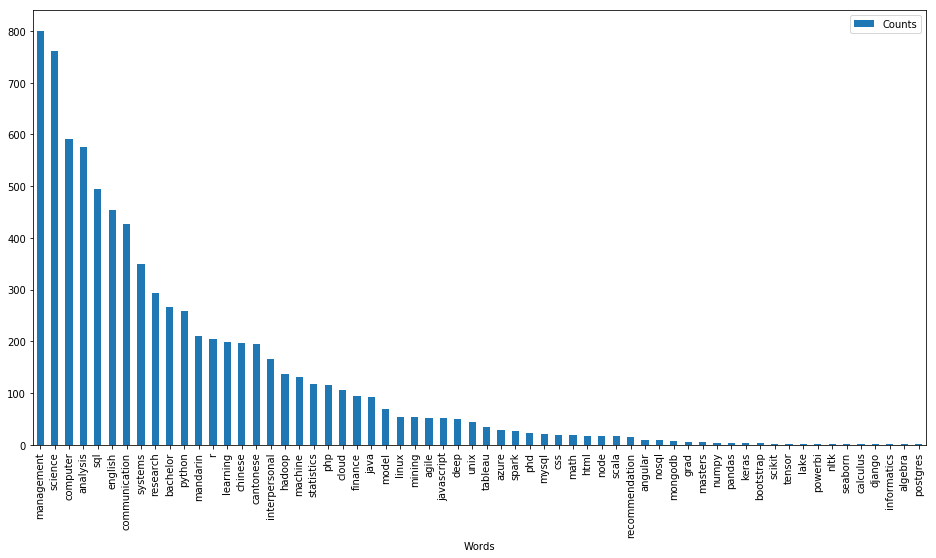

In [13]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
#plt.bar(range(len(df5)), df5['Counts'])
df5.plot(kind='bar')
plt.show()

# Using Ngrams function to figure out what employer usually require for data related job titles

The following tables show words that are most frequently been used together

In [10]:
job_trigrams = ngrams(filtered, 3)
job_trigrams_frequency = Counter(job_trigrams)
a = job_trigrams_frequency.most_common(25)
df3 = pd.DataFrame(a)
df3.columns = ['Trigrams', 'Count']
df3

,Trigrams,Count
0,"(data, data, data)",274
1,"(data, analysis, data)",263
2,"(bachelor, computer, science)",170
3,"(data, data, analysis)",160
4,"(computer, science, management)",156
5,"(english, cantonese, mandarin)",128
6,"(data, bachelor, computer)",120
7,"(analysis, data, analysis)",117
8,"(communication, english, cantonese)",114
9,"(cantonese, mandarin, data)",109


- From the above results, a lot of employers are hiring for data and relational database management with SQL or PHP.
- However, despite plenty of employers expressed the need for data analysis, only few can specify analytic languages such as Python and R, and fewer mentioned about useful data visualization tools like Tableau and PowerBi.
- While powerful python analytic tools and libraries, and even the stunning, easy-to-use Microsoft PowerBi only existed for a few years, traditional education institutions have yet to adept to the radical changes of data analytic world, employers still using computer science bachelor degree as a screening standard, which costed them real talents and competitive advantage. 
- Knowing that data analytic is still new to employers in Hong Kong, it is possible that knowledge gap exists between HR department and the actual needs of their data team, leaving companies in the danger of falling behind in this big data era.